### KNN classifying the Wisconsin Breast Cancer DS

#### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn

#### Load the Wisconsin Breast Cancer Data Set

This DS contains features extracted from scanned images CT scan, x-rays, MRIs,..etc.  
Physicians has detected tumor in each one of those images given its features that describes a small aspect of a tumor. 

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

#### Explore the data

In [3]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

#### Converting to a data frame

In [9]:
df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.describe() ## Descriptive Statistics

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
df['Target'] = cancer_data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [17]:
df['Target'].value_counts()

1    357
0    212
Name: Target, dtype: int64

#### Split the data into Train and Test datasets

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
            cancer_data.data,
            cancer_data.target,
            stratify = cancer_data.target,
            shuffle = True,
            random_state = 144)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)
(426,)
(143, 30)


#### Apply the KNN Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

#### Train the model

In [21]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
print("test Set Predictions: {}".format(knn.predict(x_test)))

test Set Predictions: [1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1]


#### Testing Accuracy

In [24]:
print("test set accuracy: {:.2f}".format(knn.score(x_test,y_test)))

test set accuracy: 0.92


#### Feature Scaling
- Improving the performance of the model
- Tuning the hyper-parameter k of the KNN model to find its best value

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
knn.fit(x_train_scaled, y_train)
print("test set accuracy: {:.2f}". format(knn.score(x_test_scaled, y_test)))
print("train set accuracy: {:.2f}". format(knn.score(x_train_scaled, y_train)))


test set accuracy: 0.97
train set accuracy: 0.98


#### Testing with different values of K

In [27]:
train_accuracy = []
test_accuracy = []

neighbors = range(1, 11)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train_scaled, y_train)
    train_accuracy.append(knn.score(x_train_scaled, y_train))
    test_accuracy.append(knn.score(x_test_scaled, y_test))

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

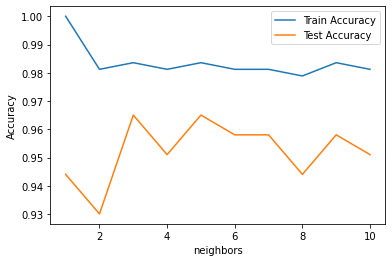

In [30]:
plt.plot(neighbors, train_accuracy, label = "Train Accuracy")
plt.plot(neighbors, test_accuracy, label = "Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("neighbors")
plt.legend()

In [31]:
## by looking at the graph above, we can see that our best accuracy rate goes with K =3 and k= 5

In [35]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_scaled, y_train)
print(knn.score(x_test_scaled, y_test))
print(knn.score(x_train_scaled, y_train))

0.958041958041958
0.9835680751173709
